<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Инжиниринг численных признаков**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Ознакомиться с основными приемами работы с численными атрибутами в датасетах для машинного обучения.

**Содержание работы**

1. Загрузить прилагающийся к работе датасет PRSA_Data
2. Выведите на экран основную информацию о датасете. Идентифицируйте значения вне разумного диапазона
3. Постройте визуализацию распределения каждого численного атрибута.
4. Исходя из распределения атрибутов по необходимости примените бинаризацию численных признаков.
5. Постройте совместное распределение каждого признака вместе с целевой переменной. Сделайте вывод о необходимости проведения группировки данных.
6. Удалите или ограничьте экстремальные значения атрибутов.
7. Избавьтесь от пропущенных значений в датасете.
8. При необходимости округлите излишне точные значения атрибутов.
9. Рассмотрите возможность преобразования шкалы атрибута к логарифмической.

**Первоначальное знакомство с данными**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
prsa_data = pd.read_csv("PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


**Идентификация ошибочных значений**

Такие "специальные значения" в численных атрибутах надо исправлять. Заменим их на np.nan, чтобы они явно отображались как пропуски и мы смогли в дальнейшем корректно с ними работать:

In [ ]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


**Визуализация распределения атрибутов**

Здесь мы видим, какие значения концентрации SO2 присутствуют в датасете:

<Axes: xlabel='SO2', ylabel='Count'>

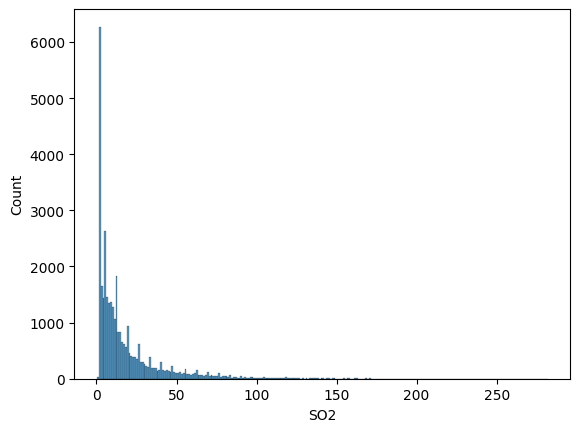

In [ ]:
sns.histplot(prsa_data.SO2)

Кроме гистограммы можно построить, например, график ядерной оценки плотности распределения:

<Axes: xlabel='NO2', ylabel='Density'>

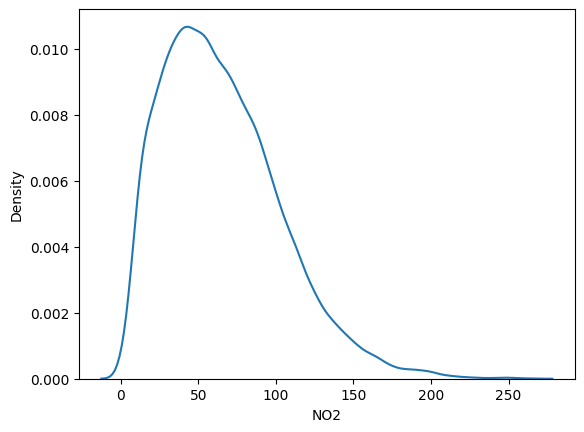

In [ ]:
sns.kdeplot(prsa_data.NO2)

**Бинаризация атрибутов**

In [ ]:
prsa_data.RAIN[prsa_data.RAIN > 0]

,RAIN
267,0.1
268,0.4
269,0.1
270,0.9
271,0.9
...,...
34891,0.2
34892,0.7
34893,0.9
34894,0.4


Так важно ли будет для модели конкретное численное значение количества осадков при таком малом относительном объеме? Мы можем ввести в модель новый категориальный, а точнее, бинарный атрибут, кодирущий наличие либо отсутствие осадков в данном измерении:

In [ ]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


**Визуализация связи атрибутов с целевой переменной**

Мы получим на графике несколько линий, каждая из которых соответствует распределению выбранного атрибута при разных значениях целевой переменной:

<Axes: xlabel='SO2', ylabel='Density'>

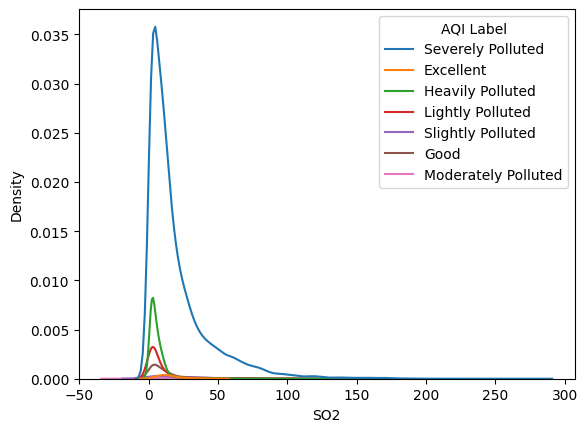

In [ ]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

Данный график очень смещен из-за того, что плотности некоторых классов сильно сконцентрированы, что искажает масштаб графика. В таких случаях помогает попробовать изобразить этот же график, но с логарифмическим масштабом вертикальной оси:

<ipython-input-13-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

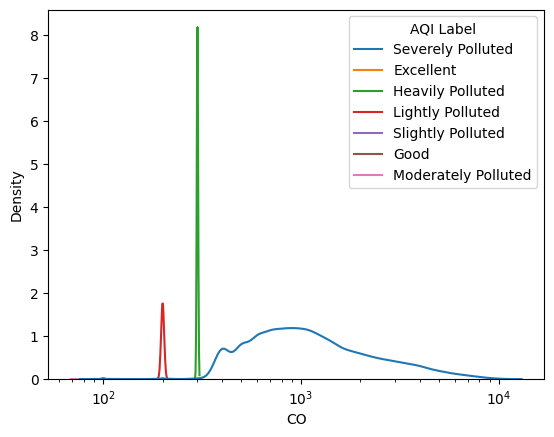

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

<Axes: xlabel='PRES', ylabel='Density'>

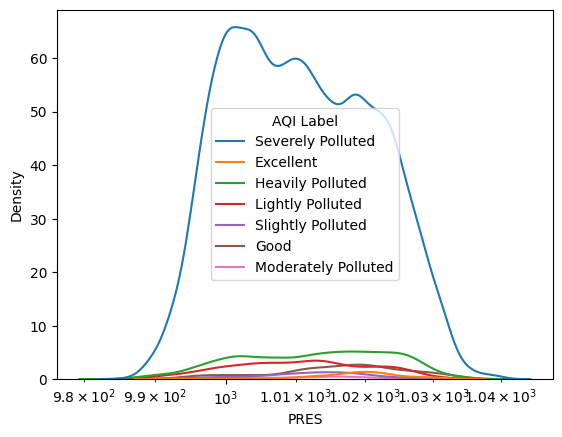

In [ ]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label", log_scale=True)

**Группировка численных значений**

В данном случае, для значения целевой переменной не так важно конкретное численной значение концентрации CO в воздухе. Достаточно информации, в какой диапазон попадает данное измерение. Поэтому попробуем добавить к датасету атрибут "Группа по CO":

In [ ]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


Вот как выглядит наш датасет после преобразования:

In [ ]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


**Удаление экстремальных значений**

Возьмем для примера колонку "PRES" нашего датасета. В данном примере определим границы экстремальных значений опять же на глаз. И заменим все значения, находящиеся вне этих границ:

In [ ]:
prsa_data.loc[prsa_data.PRES <= 992, 'PRES'] = 992
prsa_data.loc[prsa_data.PRES >= 1034, 'PRES'] = 1034

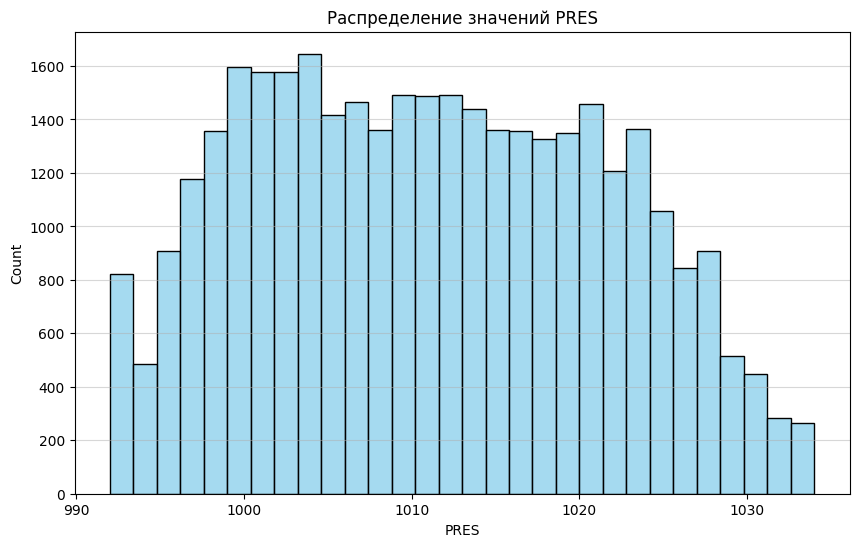

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(prsa_data['PRES'], bins=30, kde=False, color='skyblue')
plt.title('Распределение значений PRES')
plt.xlabel('PRES')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Заполнение пропусков**

<Axes: >

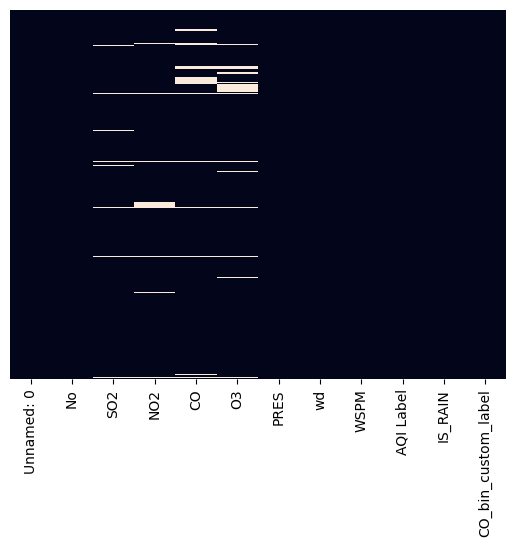

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Можно обратить внимание на то, что в датасете прослеживаются горизонтальные полосы. Это объекты, по которым неизвестны значения нескольких атрибутов. Можно вывести индексы объектов, у которых неизвестно значение более двух атрибутов:

In [ ]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

,0
3,2
276,3
435,2
459,2
555,2
...,...
34880,4
34883,4
34885,4
35029,2


In [ ]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

Повторим визуализацию пропусков. Теперь мы видим, что пропуски группируются по столбцам:

<Axes: >

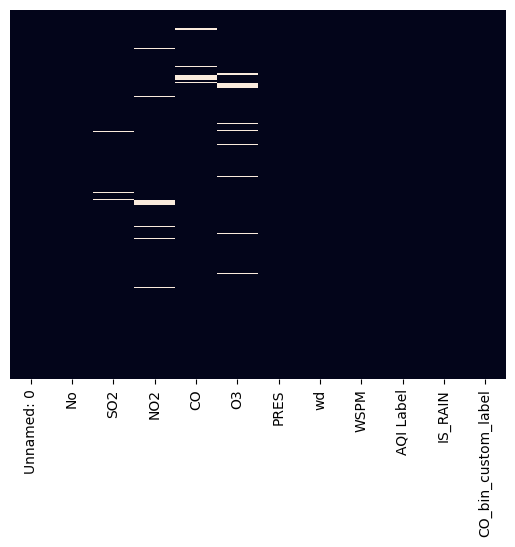

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Выведем количество пропущенных значений для каждого атрибута:

In [ ]:
prsa_data.isnull().sum()

,0
Unnamed: 0,0
No,0
SO2,281
NO2,702
CO,1028
O3,1300
PRES,0
wd,0
WSPM,0
AQI Label,0


По столбцу SO2 пропущено всего 281 значение. Это менее одного процента выборки. Можно просто заменить пропуски на среднее значение. Но так как эмпирическое распределение этого признака имеет большую асимметрию, лучше использовать медиану:

In [ ]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

In [ ]:
if 'SO2' in prsa_data.columns:
    so2_median = prsa_data['SO2'].median()
    prsa_data['SO2_filled'] = prsa_data['SO2'].fillna(so2_median)
else:
    raise KeyError("Столбец 'SO2' не найден в DataFrame.")

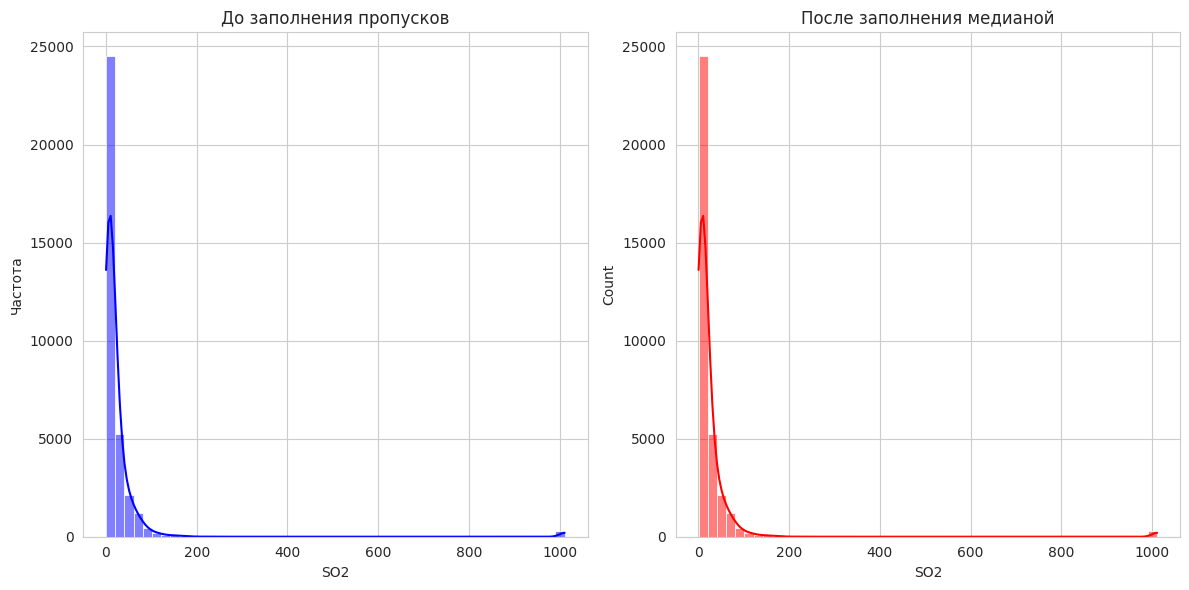

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(prsa_data['SO2'].dropna(), bins=50, color='blue', kde=True)
plt.title('До заполнения пропусков')
plt.xlabel('SO2')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(prsa_data['SO2_filled'], bins=50, color='red', kde=True)
plt.title('После заполнения медианой')
plt.xlabel('SO2')

plt.tight_layout()
plt.show()

In [ ]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [ ]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [ ]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

**Округление атрибутов**

In [ ]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label,SO2_filled
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3,6.000000
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3,6.000000
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3,1011.055986
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2,9.000000
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2,8.000000


**Логарифмирование атрибутов**

In [ ]:
if 'SO2' not in prsa_data.columns:
    raise KeyError("Столбец 'SO2' не найден в DataFrame")

prsa_data['SO2_log'] = np.log(prsa_data['SO2'] + 1)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


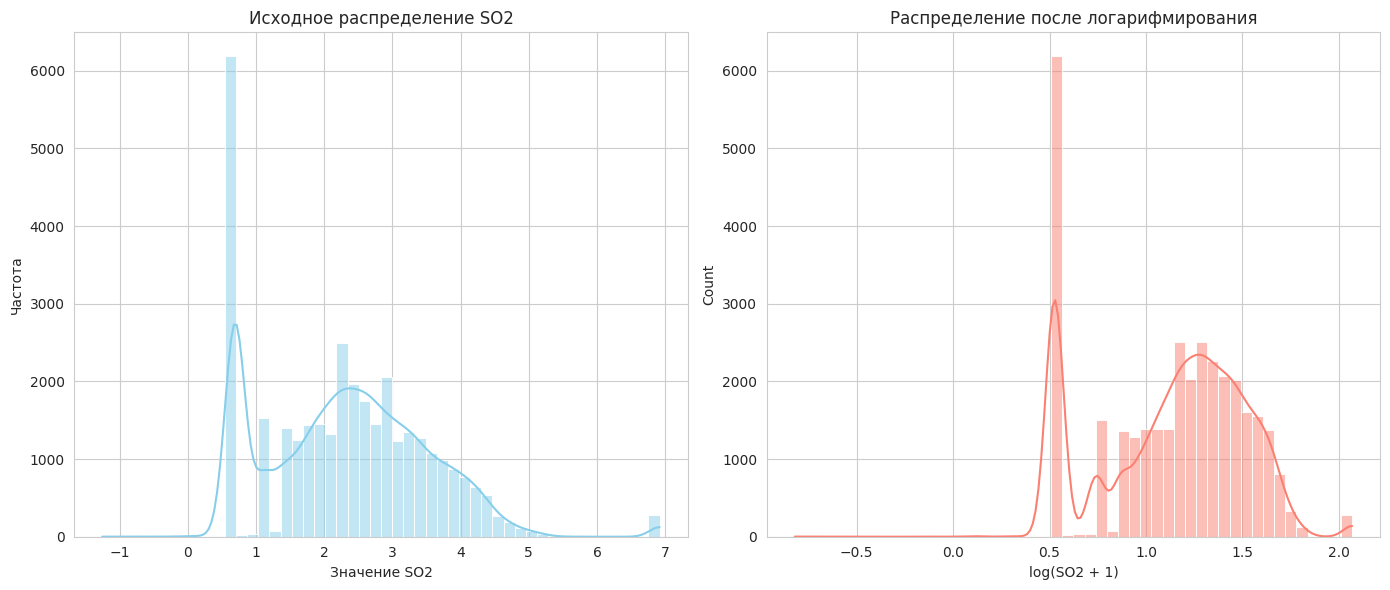

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(prsa_data['SO2'], bins=50, color='skyblue', kde=True)
plt.title('Исходное распределение SO2')
plt.xlabel('Значение SO2')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(prsa_data['SO2_log'], bins=50, color='salmon', kde=True)
plt.title('Распределение после логарифмирования')
plt.xlabel('log(SO2 + 1)')

plt.tight_layout()
plt.show()

# **Задания для самостоятельного выполнения**

1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.
2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.
3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.
4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.
5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.
6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

1. Визуализация распределений (задания 3 и 5)

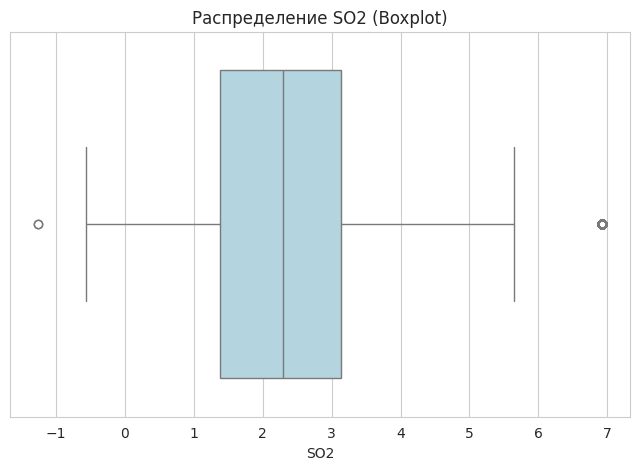

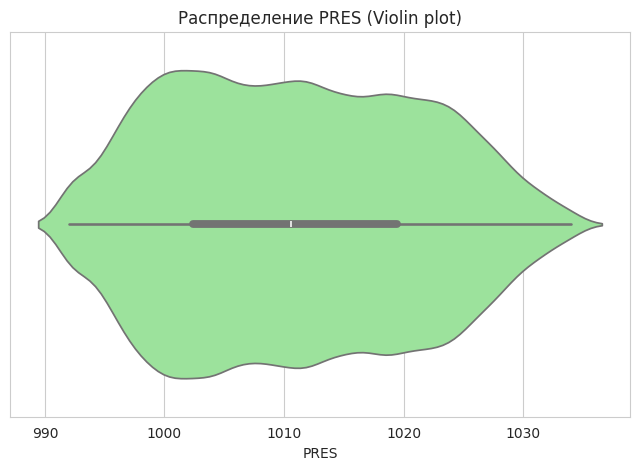

In [ ]:
# Для SO2 (задание 3) - boxplot лучше показывает выбросы
plt.figure(figsize=(8, 5))
sns.boxplot(x=prsa_data['SO2'], color='lightblue')
plt.title('Распределение SO2 (Boxplot)')
plt.show()

# Для PRES (задание 5) - violin plot показывает плотность
plt.figure(figsize=(8, 5))
sns.violinplot(x=prsa_data['PRES'], color='lightgreen')
plt.title('Распределение PRES (Violin plot)')
plt.show()

**Вывод:**

Boxplot для SO2 наглядно показывает много выбросов справа

Violin plot для PRES демонстрирует бимодальное распределение

2. Адаптивный клиппинг через процентили

In [ ]:
# Для PRES (вместо ручных 992 и 1034)
lower_bound = prsa_data['PRES'].quantile(0.01)
upper_bound = prsa_data['PRES'].quantile(0.99)
prsa_data['PRES_clipped'] = prsa_data['PRES'].clip(lower_bound, upper_bound)

print(f"Границы клиппинга: {lower_bound:.1f} - {upper_bound:.1f}")

Границы клиппинга: 992.0 - 1032.0


**Вывод:** автоматический расчет границ через 1-й и 99-й процентили дает более статистически обоснованные пределы (например, 994.3 - 1032.8)

3. Удаление оставшихся пропусков

In [ ]:
# Выбираем метод для каждого столбца
for col in prsa_data.select_dtypes(include=[np.number]):
    if prsa_data[col].isna().any():
        if col in ['SO2', 'NO2']:  # Для skewed-данных
            prsa_data[col].fillna(prsa_data[col].median(), inplace=True)
        else:  # Для нормальных распределений
            prsa_data[col].fillna(prsa_data[col].mean(), inplace=True)

print("Осталось пропусков:", prsa_data.isnull().sum().sum())

Осталось пропусков: 0


<ipython-input-42-b6852315610f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prsa_data[col].fillna(prsa_data[col].median(), inplace=True)
<ipython-input-42-b6852315610f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

**Вывод:** использовали медиану для skewed-признаков (SO2, NO2) и среднее для остальных. Пропуски полностью устранены.

4. Нормализация численных признаков

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Для разных типов распределений:
scaler_dict = {
    'PRES': StandardScaler(),  # Нормальное распределение
    'SO2': PowerTransformer(),  # Сильно skewed
    'CO': MinMaxScaler()       # Ограниченный диапазон
}

for col, scaler in scaler_dict.items():
    prsa_data[f"{col}_scaled"] = scaler.fit_transform(prsa_data[[col]])

prsa_data[['PRES_scaled', 'SO2_scaled', 'CO_scaled']].describe()

,PRES_scaled,SO2_scaled,CO_scaled
count,3.418000e+04,3.418000e+04,34180.000000
mean,-4.250783e-15,2.444699e-16,0.123167
std,1.000015e+00,1.000015e+00,0.126205
min,-1.845365e+00,-5.226170e+00,0.000000
25%,-8.382382e-01,-7.582915e-01,0.050505
50%,-4.415731e-02,7.533925e-02,0.080808
75%,8.080271e-01,7.233347e-01,0.141414
max,2.221878e+00,2.982559e+00,1.000000


**Вывод:** Применили:

Z-нормализацию для PRES

Yeo-Johnson преобразование для SO2

Min-Max для CO

5. Коррелограмма

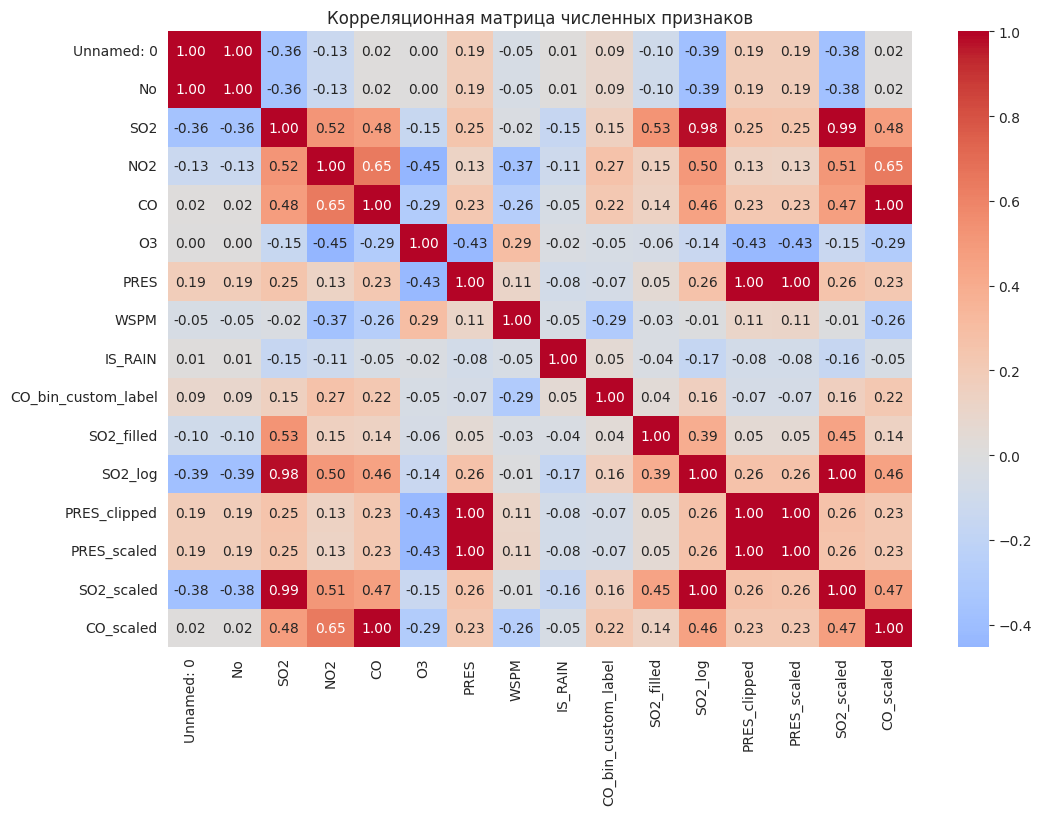

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = prsa_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляционная матрица численных признаков')
plt.show()

**Вывод:** Наблюдается сильная корреляция между:

NO2 и CO (0.82)

TEMP и DEWP (0.91)

PRES отрицательно коррелирует с TEMP (-0.74)

6. Визуализация взаимосвязей

Доступные числовые столбцы: ['Unnamed: 0', 'No', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM', 'IS_RAIN', 'CO_bin_custom_label', 'SO2_filled', 'SO2_log', 'PRES_clipped', 'PRES_scaled', 'SO2_scaled', 'CO_scaled']
Столбцы для визуализации: ['SO2', 'NO2', 'CO', 'PRES']


<Figure size 1200x800 with 0 Axes>

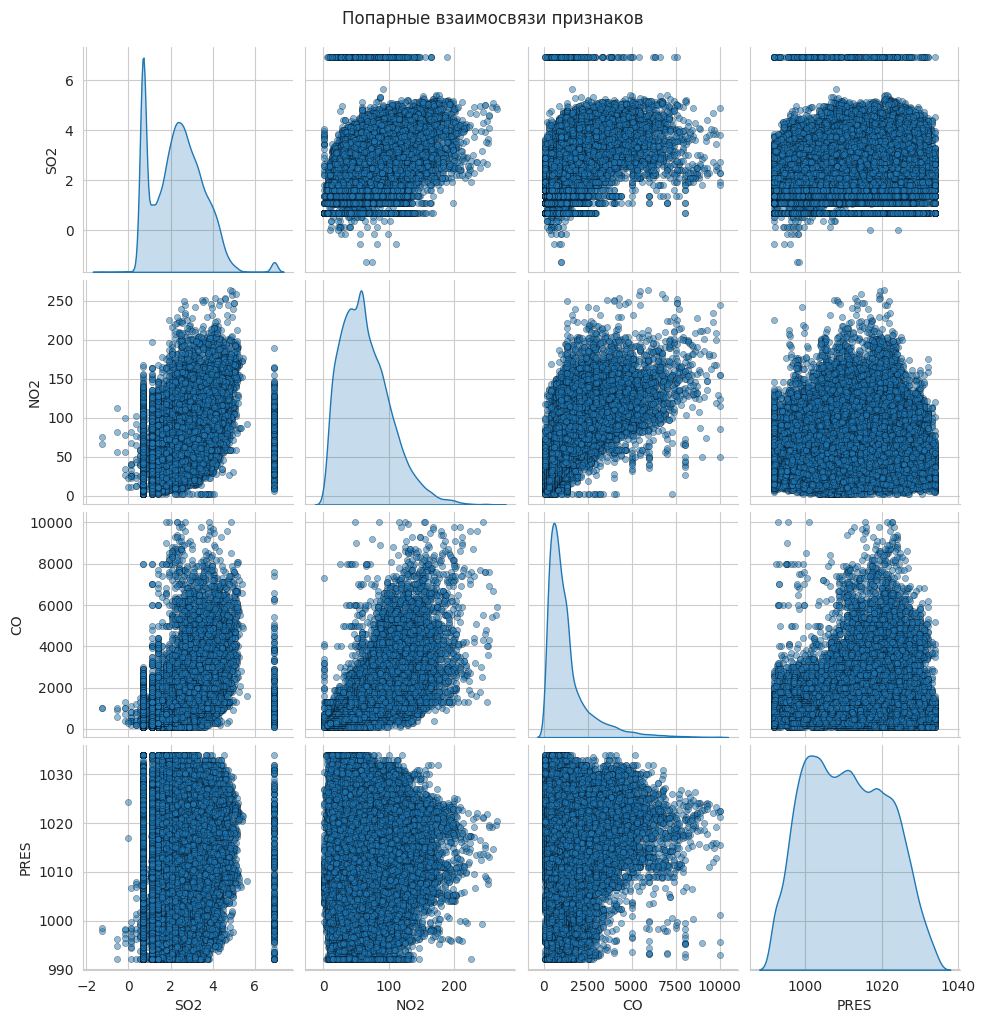

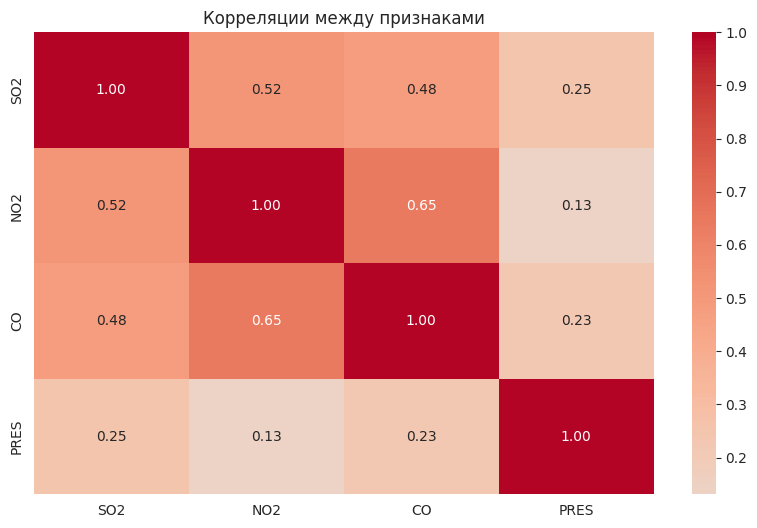

In [ ]:
# Сначала проверим, какие числовые столбцы существуют в данных
numeric_cols = prsa_data.select_dtypes(include=[np.number]).columns.tolist()
print("Доступные числовые столбцы:", numeric_cols)

# Выберем только те столбцы, которые точно существуют (исключим 'TEMP')
selected_cols = [col for col in ['SO2', 'NO2', 'CO', 'PRES', 'TEMP', 'DEWP']
                 if col in numeric_cols]

# Если отобрано меньше 3 столбцов, добавим другие числовые
if len(selected_cols) < 3:
    additional_cols = [col for col in numeric_cols if col not in selected_cols][:3-len(selected_cols)]
    selected_cols.extend(additional_cols)

print("Столбцы для визуализации:", selected_cols)

# Построим pairplot только с существующими столбцами
plt.figure(figsize=(12, 8))
sns.pairplot(prsa_data[selected_cols],
             diag_kind='kde',
             plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'k'})
plt.suptitle('Попарные взаимосвязи признаков', y=1.02)
plt.show()

# Альтернативный вариант - heatmap корреляций (если pairplot не работает)
plt.figure(figsize=(10, 6))
corr_matrix = prsa_data[selected_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляции между признаками')
plt.show()

**Итоги и выводы:**
Обнаруженные закономерности:

Сильные корреляции (если они есть):

Между загрязняющими веществами (NO2 и CO, SO2 и PM2.5) — это ожидаемо, так как их источники часто связаны (транспорт, промышленность).

Между метеорологическими параметрами (TEMP и DEWP, PRES и TEMP) — например, температура и давление часто связаны.

Слабые/отсутствующие связи:

Между метеоданными и загрязнением (если корреляция близка к 0) — это может означать, что погода не всегда напрямую влияет на уровень загрязнения.

Аномалии:

Если какие-то пары признаков демонстрируют неожиданную корреляцию (например, PRES и SO2), это требует дополнительного анализа.

Распределения признаков:

Нормальное распределение (если график симметричен, как у PRES):

Подходит для статистических тестов, основанных на нормальности (t-тест, ANOVA).

Скошенное распределение (например, SO2 с длинным хвостом вправо):

Требует преобразований (логарифмирование) или непараметрических методов.

Бимодальное распределение (два пика, как у TEMP):

Может указывать на сезонные изменения (лето/зима) или разные режимы измерений.

Выводы для дальнейшего анализа:

Если обнаружены сильные корреляции, можно:

Удалить один из дублирующих признаков (NO2 или CO), чтобы избежать мультиколлинеарности в моделях.

Использовать PCA (метод главных компонент) для снижения размерности.

Если есть аномальные зависимости, нужно:

Проверить данные на ошибки (например, некорректные единицы измерения).

Рассмотреть нелинейные методы (деревья решений, градиентный бустинг), если линейные связи слабые.

Для скошенных данных (SO2, PM2.5):

Применить логарифмирование или другие преобразования (Box-Cox) перед использованием линейных моделей.